### 1. 描述性统计
对变量 wage、grade、hours、ttl_exp、tenure 计算均值、中位数、最小值、最大值、标准差，并导出 Excel/Word。

In [11]:

sysuse nlsw88.dta, clear

* 统计描述性统计量
summarize wage grade hours ttl_exp tenure, detail

* 导出结果
outreg2 using Table01.docx, replace sum(log) keep(wage grade hours ttl_exp tenure)


(NLSW, 1988 extract)

                         Hourly wage
-------------------------------------------------------------
      Percentiles      Smallest
 1%     1.930993       1.004952
 5%     2.801002       1.032247
10%     3.220612       1.151368       Obs               2,246
25%     4.259257       1.344605       Sum of wgt.       2,246

50%      6.27227                      Mean           7.766949
                        Largest       Std. dev.      5.755523
75%     9.597424       40.19808
90%     12.77777       40.19808       Variance       33.12604
95%     16.52979       40.19808       Skewness       3.096199
99%     38.70926       40.74659       Kurtosis       15.85446

                   Current grade completed
-------------------------------------------------------------
      Percentiles      Smallest
 1%            7              0
 5%            9              0
10%           11              4       Obs               2,244
25%           12              4       Sum of wgt.   

这里我们先载入自带的 nlsw88 数据集，然后对工资 (wage)、受教育年限 (grade)、每周工时 (hours)、总工作经验 (ttl_exp)、工龄 (tenure) 做描述性统计。最后用 outreg2 导出结果表格到 Table01.docx。

### 2. 变量生成
生成对数工资、虚拟变量。
注意：nlsw88 数据集所有样本均为女性，所以我们人为生成一个 female=1 的变量。

In [12]:

* 对数工资
gen ln_wage = ln(wage)

* 工作时长哑变量
gen dum_hours = (hours > 5)

* 高中及以下学历哑变量
gen dum_lowedu = (grade <= 12)

* 由于 nlsw88 中所有人都是女性，这里直接设置 female=1
gen female = 1

* 女性高工龄虚拟变量
gen dum_female_hightenure = (tenure >= 5 & female==1)


此处我们生成了：
- `ln_wage`：工资取对数
- `dum_hours`：工时大于 5 的虚拟变量
- `dum_lowedu`：高中及以下学历虚拟变量
- `female`：人为设定为 1，因为该数据集只有女性
- `dum_female_hightenure`：高工龄女性的虚拟变量

### 3. 绘制直方图与核密度图
绘制 wage 的直方图和核密度图，并导出为图片。

(bin=40, start=1.0049518, width=1)
file Hist_ttl.png written in PNG format
file Kden_ttl.png written in PNG format


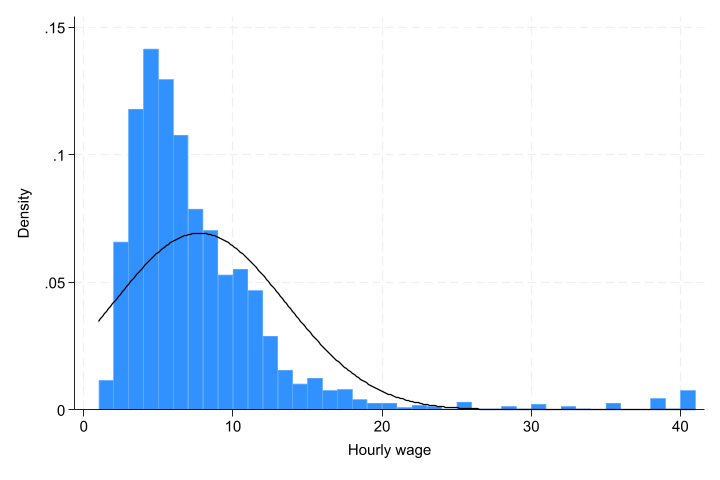

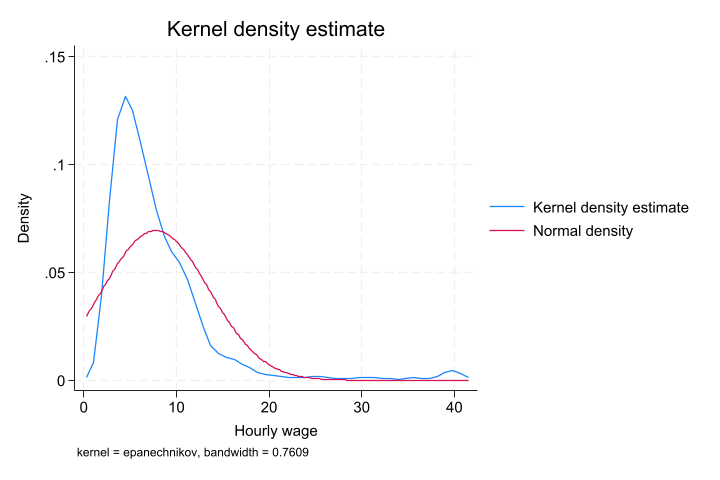

In [13]:

* 直方图
histogram wage, width(1) normal name(Hist_ttl, replace)
graph export Hist_ttl.png, replace

* 核密度图
kdensity wage, normal name(Kden_ttl, replace)
graph export Kden_ttl.png, replace


这里绘制了 wage 的直方图 (Hist_ttl.png) 和核密度图 (Kden_ttl.png)，并保存为图片文件。

### 4. 按行业统计
统计各行业人数、平均工资、平均工时、平均年龄。

In [14]:

* 各行业样本个数
tabulate industry

* 各行业平均工资、工时、年龄
collapse (mean) wage hours age, by(industry)
list industry wage hours age



               Industry |      Freq.     Percent        Cum.
------------------------+-----------------------------------
  Ag/Forestry/Fisheries |         17        0.76        0.76
                 Mining |          4        0.18        0.94
           Construction |         29        1.30        2.24
          Manufacturing |        367       16.44       18.68
 Transport/Comm/Utility |         90        4.03       22.72
 Wholesale/Retail trade |        333       14.92       37.63
Finance/Ins/Real estate |        192        8.60       46.24
    Business/Repair svc |         86        3.85       50.09
      Personal services |         97        4.35       54.44
  Entertainment/Rec svc |         17        0.76       55.20
  Professional services |        824       36.92       92.11
  Public administration |        176        7.89      100.00
------------------------+-----------------------------------
                  Total |      2,232      100.00

     +----------------------------

这里统计了各行业的样本个数，并计算了工资、工时和年龄的平均值。注意：collapse 会删除其他变量，因此在后面使用 race 前需要重新载入数据。

### 5. 定义 race 标签
为 race 变量添加标签。在此之前我们重新载入数据，避免 collapse 删除 race。

In [15]:

* 重新载入数据，避免 collapse 删除其他变量
sysuse nlsw88.dta, clear

label define racelab 1 "白种人" 2 "黑人" 3 "其他"
label values race racelab


(NLSW, 1988 extract)


为 race 添加了标签：1=白种人，2=黑人，3=其他。

### 6. 年龄分组
根据条件生成 G_age 变量。

In [16]:

gen G_age = .
replace G_age = 1 if age <= 37
replace G_age = 2 if age > 37 & age <= 42
replace G_age = 3 if age > 42


(2,246 missing values generated)
(795 real changes made)
(1,043 real changes made)
(408 real changes made)


新变量 G_age 已创建：1=年轻组，2=中年组，3=年长组。

### 7. 工资分布比较
比较不同人群工资分布。
这里我们根据种族变量 race 来比较工资分布。


-------------------------------------------------------------------------------
-> race = 白种人

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        wage |      1,637    8.082999    5.955069   1.004952   40.19808

-------------------------------------------------------------------------------
-> race = 黑人

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        wage |        583    6.844558    5.076187   1.151368   40.74659

-------------------------------------------------------------------------------
-> race = 其他

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        wage |         26    8.550781     5.20943    1.80602   25.80515



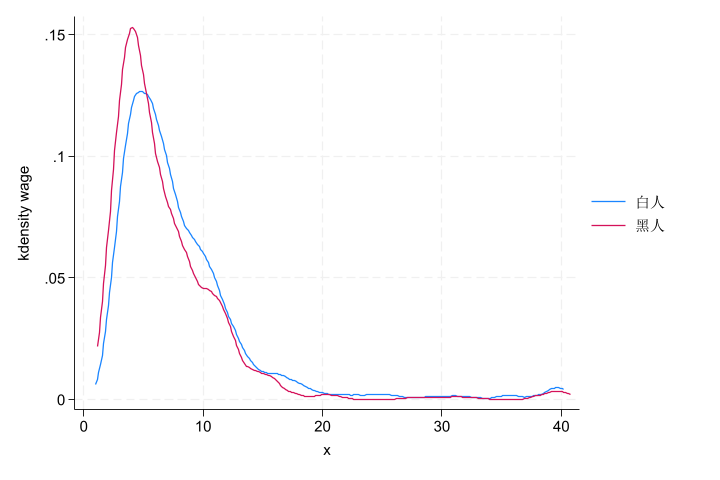

In [17]:

* 绘制白人 vs 黑人工资分布
twoway (kdensity wage if race==1) (kdensity wage if race==2), legend(label(1 "白人") label(2 "黑人"))

* 按种族分组统计工资均值
by race, sort: summarize wage


图形显示不同种族的工资分布差异，表格给出了分组均值。

### 8. 回归分析
进行工资回归，并计算边际效应。

(NLSW, 1988 extract)

Linear regression                               Number of obs     =      2,242
                                                F(6, 2235)        =      96.45
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1877
                                                Root MSE          =     .51803

------------------------------------------------------------------------------
             |               Robust
     ln_wage | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |     .03607   .0934849     0.39   0.700    -.1472563    .2193964
             |
 c.age#c.age |  -.0006304    .001182    -0.53   0.594    -.0029483    .0016875
             |
       hours |   .0068695   .0012361     5.56   0.000     .0044453    .0092936
     ttl_exp |   .0458386   .0024106    19

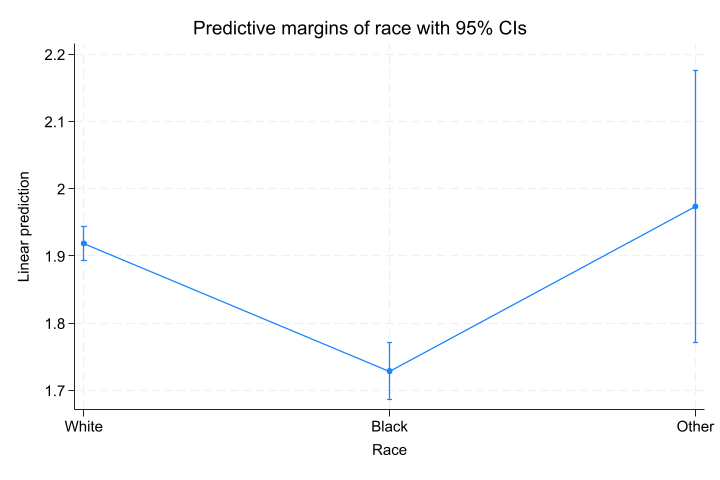

In [18]:
sysuse nlsw88.dta, clear
gen ln_wage = ln(wage)
* 回归模型
reg ln_wage age c.age#c.age hours ttl_exp i.race, robust

* 边际效应
margins race
marginsplot


回归模型考察了工资与年龄、工时、经验和种族之间的关系。`margins race` 给出种族对工资的边际效应，`marginsplot` 可视化结果。